# Practica: Prediccion Precio Viviendas Airbnb

En este notebook realizaremos un proyecto de Machine Learning en el que utilizaremos los conceptos y tecnicas aprendidas durante el modulo de 'Machine Learning 101' del Bootcamp de Keepcoding.

Se trata de un problema de regresión, en el que prediciremos el precio final de ciertas viviendas de Airbnb teniendo en cuenta sus caracteristicas.

## Librerias y Funciones

Cargamos las librerias y funciones que utilizaremos a lo largo del notebook

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Carga del Dataset y Analisis Exploratorio de los Datos

En esta seccion, haremos un filtrado de las dimensiones relevantes para la prediccion del precio de la vivienda. Así como un tratamiento de los valores nulos para las columnas que mantengamos, filtrandolos en algunos casos y transformandolos en otros.

In [29]:
data = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')

In [16]:
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,13994948,https://www.airbnb.com/rooms/13994948,20170402075052,2017-04-02,Cozy Duplex in De Pijp,An exceptional and quite house with all you ne...,"The house has 2 floors. In the first floor, yo...",An exceptional and quite house with all you ne...,none,De Pijp is one of the most cosmopolitan and vi...,NaN,"The closest tram stop to the house, Lutmanstra...","As per stay with us, you'll be sharing all the...","Usually we are working during work ours, other...",* Eating inside the bedroom is not allowed. * ...,https://a0.muscache.com/im/pictures/7d24d221-a...,https://a0.muscache.com/im/pictures/7d24d221-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/7d24d221-a...,4742444,https://www.airbnb.com/users/show/4742444,Javi,2013-01-17,"Amsterdam, North Holland, The Netherlands","Javi, born in '88 in Madrid, Spain.\r\n\r\nSel...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/b65cac92-1...,https://a0.muscache.com/im/pictures/b65cac92-1...,De Pijp,2.0,2.0,"email,phone,facebook,reviews,jumio,work_email","De Pijp, Amsterdam, Noord-Holland 1074 VM, Net...",De Pijp,De Pijp - Rivierenbuurt,NaN,Amsterdam,Noord-Holland,1074 VM,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.352700,4.904824,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Wireless Internet,Kitchen,Heating,...",NaN,80.0,NaN,NaN,200.0,25.0,1,0,3,6,6 days ago,NaN,0,2,2,2,2017-04-02,12,2016-07-24,2017-03-26,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,Amsterdam,moderate,2.0,1.42,"52.3527003359,4.90482373061","Host Has Profile Pic,Host Identity Verified,Is..."
1,9474923,https://www.airbnb.com/rooms/9474923,20170512105218,2017-05-12,Sunny&cozy flat in residential area,My comfortable apartment is in a quiet neighbo...,Bright living room with open view. Newly renov...,My comfortable apartment is in a quiet neighbo...,none,The new South 'Zuid' is a trendy area with wid...,NaN,"Several metro, bus and tram stops on 5 minutes...",Living room with sofa and dining table. Fully ...,NaN,Strictly no smoking. No pets. No noise after 2...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,10690074,https://www.airbnb.com/users/show/10690074,Sofie,2013-12-18,"Antwerp, Flanders, Belgium",I love travelling. It's my passion. City tripp...,NaN,NaN,NaN,https://a0.muscache.com/im/users/10690074/prof...,https://a0.muscache.com/im/users/10690074/prof...,NaN,1.0,1.0,"email,phone,reviews,jumio,work_email","Antwerpen, Vlaanderen 2018, Belgium",NaN,Brederode,NaN,Antwerpen,Vlaanderen,2018,Antwerp,"Antwerpen, Belgium",BE,Belgium,51.204759,4.403729,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Hot tub,Heating,Wash...",NaN,64.0,NaN,NaN,NaN,NaN,1,0,60,1125,7 months ago,N

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Review Scores Communication,14703.0,7.492757,4.074575,0.000000,8.000000,10.000000,10.000000,10.000000
Review Scores Location,14703.0,7.389988,4.036713,0.000000,8.000000,10.000000,10.000000,10.000000
Review Scores Value,14703.0,7.146161,3.938212,0.000000,7.000000,9.000000,10.000000,10.000000
Review Scores Rating,14703.0,71.315038,38.942219,0.000000,73.000000,91.000000,97.000000,100.000000
Review Scores Accuracy,14703.0,7.308849,4.007615,0.000000,8.000000,9.000000,10.000000,10.000000
Calculated host listings count,14699.0,9.504116,23.634697,1.000000,1.000000,2.000000,5.000000,145.000000
Reviews per Month,14703.0,1.472986,1.825021,0.000000,0.100000,0.740000,2.230000,17.210000
Host Total Listings Count,14700.0,12.543537,34.130570,0.000000,1.000000,2.000000,6.000000,519.000000
Latitude,14703.0,40.498211,4.600599,-37.851182,40.409740,40.419432,40.430888,55.966912
Longitude,14703.0,-3.875594,14.103674,-123.131344,-3.707612,-3.700792,-3.684258,153.371427


In [17]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

## Primer Filtrado Manual

Se llevan a cabo una primera seleccion de las variables potencialmente relevantes. Quedandonos con 36 variables.

In [19]:
data.head(10)

,Experiences Offered,Review Scores Communication,Review Scores Location,Review Scores Value,Review Scores Rating,Review Scores Accuracy,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Neighbourhood,Host Total Listings Count,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number of Reviews
0,none,10.0,10.0,10.0,97.0,10.0,Amsterdam,moderate,2.0,1.42,De Pijp,2.0,52.352700,4.904824,Apartment,Private room,1.0,1.0,1.0,Real Bed,80.0,200.0,25.0,1,0,3,12
1,none,10.0,10.0,9.0,97.0,10.0,None,strict,1.0,0.43,No data,1.0,51.204759,4.403729,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,64.0,0.0,0.0,1,0,60,7
2,none,10.0,10.0,10.0,100.0,10.0,None,strict,1.0,0.06,West Austin,1.0,30.287124,-97.768164,House,Entire home/apt,2.0,3.0,3.0,Real Bed,795.0,0.0,250.0,1,0,3,1
3,none,0.0,0.0,0.0,0.0,0.0,None,flexible,2.0,0.00,Glòries - El Parc,2.0,41.394711,2.187543,Apartment,Private room,2.0,1.0,1.0,Real Bed,40.0,0.0,5.0,1,15,1,0
4,none,10.0,10.0,9.0,88.0,9.0,None,strict,5.0,1.12,Sant Gervasi - Galvany,21.0,41.396293,2.142851,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,129.0,300.0,20.0,1,0,2,30
5,none,10.0,10.0,10.0,97.0,10.0,None,strict,1.0,0.46,No data,1.0,41.401622,2.162527,Apartment,Entire home/apt,1.0,2.0,2.0,Real Bed,55.0,250.0,75.0,2,7,6,12
6,none,10.0,9.0,9.0,100.0,9.0,None,strict,92.0,0.45,L'Antiga Esquerra de l'Eixample,207.0,41.403514,2.166601,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,90.0,0.0,0.0,1,0,2,2
7,none,10.0,10.0,10.0,100.0,10.0,None,moderate,1.0,0.13,Sant Gervasi - la Bonanova,1.0,41.409206,2.136281,Apartment,Entire home/apt,2.0,2.0,3.0,Real Bed,185.0,500.0,30.0,1,0,1,1
8,none,10.0,10.0,10.0,100.0,10.0,None,strict,92.0,0.10,L'Antiga Esquerra de l'Eixample,207.0,41.376214,2.144985,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,188.0,300.0,0.0,1,0,2,1
9,none,10.0,10.0,10.0,96.0,10.0,None,flexible,1.0,0.55,Sants-Montjuïc,1.0,41.372831,2.127726,Condominium,Private room,1.0,1.0,1.0,Real Bed,24.0,0.0,5.0,16,10,1,5


In [20]:
data.shape

(14665, 27)

In [25]:
features = 'Experiences Offered, Review Scores Communication, Review Scores Location, Review Scores Value, Review Scores Rating, Review Scores Accuracy, License, Jurisdiction Names, Cancellation Policy, Calculated host listings count, Reviews per Month, Host Since, Host Location, Host Response Time, Host Response Rate, Host Neighbourhood, Host Total Listings Count, Host Verifications, Latitude, Longitude, Property Type, Room Type, Bathrooms, Bedrooms, Beds, Bed Type, Amenities, Square Feet, Price, Security Deposit, Cleaning Fee, Guests Included, Extra People, Minimum Nights, Maximum Nights, Number of Reviews'

In [26]:
features = features.split(', ')

In [27]:
features

['Experiences Offered',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'License',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Response Rate',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Host Verifications',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Number of Reviews']

In [30]:
data = data[features]

In [36]:
data.shape

(14780, 36)

In [37]:
data.to_csv('./filtered_data.csv', sep=';', decimal='.', index=False)

## Analisis Exploratorio de los Datos

### Resumen Estadistico de la Variable Objetivo

In [33]:
data.Price.describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

### Exploracion de las Caracteristicas

In [41]:
def price_mean(column):
    return data.groupby(column).agg({'Price': 'mean'})

def unique(column):
    return data[column].unique()

Con el siguiente codigo haremos un analisis de los datos de cada caracteristica, con el fin de determinar que variables tienen variables nulos o que no corresponden con los que deberían y posteriormente los trataremos.

In [40]:
for col in data.columns:
    print(price_mean(col))
    print(unique(col))

                          Price
Experiences Offered            
business             184.625000
family               184.666667
none                  73.474637
romantic             124.333333
social                42.333333
['none' 'business' 'social' 'romantic' 'family']
                                 Price
Review Scores Communication           
2.0                          60.300000
4.0                          81.727273
5.0                          79.727273
6.0                          83.500000
7.0                          67.505882
8.0                          70.081395
9.0                          66.675827
10.0                         70.651319
[10. nan  6.  9.  8.  4.  7.  5.  2.]
                            Price
Review Scores Location           
2.0                     48.625000
4.0                     38.625000
5.0                     59.818182
6.0                     75.215190
7.0                     48.595960
8.0                     57.329065
9.0                     60.

                  Price
Square Feet            
0.0           76.487805
8.0           34.000000
9.0           34.000000
10.0          33.000000
16.0          40.000000
22.0          50.000000
25.0          71.666667
30.0          85.000000
32.0          66.000000
35.0          62.500000
40.0          77.333333
43.0          55.000000
45.0          81.666667
50.0          65.000000
54.0          42.000000
55.0          83.500000
60.0          55.000000
70.0          52.500000
71.0          75.000000
75.0          64.666667
80.0          76.000000
85.0         116.666667
86.0          33.333333
90.0          73.666667
97.0          16.000000
100.0         80.000000
108.0         43.555556
129.0         47.428571
140.0         50.000000
141.0        148.000000
...                 ...
883.0        145.000000
915.0        102.666667
936.0         89.000000
947.0         95.000000
969.0         66.666667
1044.0        65.000000
1076.0        97.909091
1130.0       292.500000
1163.0        95

Tras hacer un analisis y ver que hay ciertas variables cuyos diferentes valores apenas tienen correlación con la variable objetivo (por que la media se mantiene cte). Procederemos a eliminarlas

In [60]:
data = pd.read_csv('filtered_data.csv', sep=';', decimal='.')

In [61]:
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)


In [62]:
data.shape

(14780, 28)

In [63]:
data.columns

Index(['Experiences Offered', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Review Scores Rating',
       'Review Scores Accuracy', 'Jurisdiction Names', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Neighbourhood', 'Host Total Listings Count', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

Ahora, reemplazaremos valores que no interesan y eliminaremos filas con valores nulos.

In [64]:
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)

In [65]:
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]

Para comprobar si tenemos alguna caracteristica con valores nulos

In [66]:
for column in data.columns:
    if data[column].isnull().values.any() == True:
        print(column,)

Beds
Square Feet


In [68]:
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

In [70]:
data.shape

(14677, 28)

In [72]:
data.to_csv('cleansed_data.csv', sep=';', decimal='.', index=False)

## Correlation Analysis

In [73]:
numeric_data = data.select_dtypes(['number'])

In [74]:
cols = numeric_data.columns

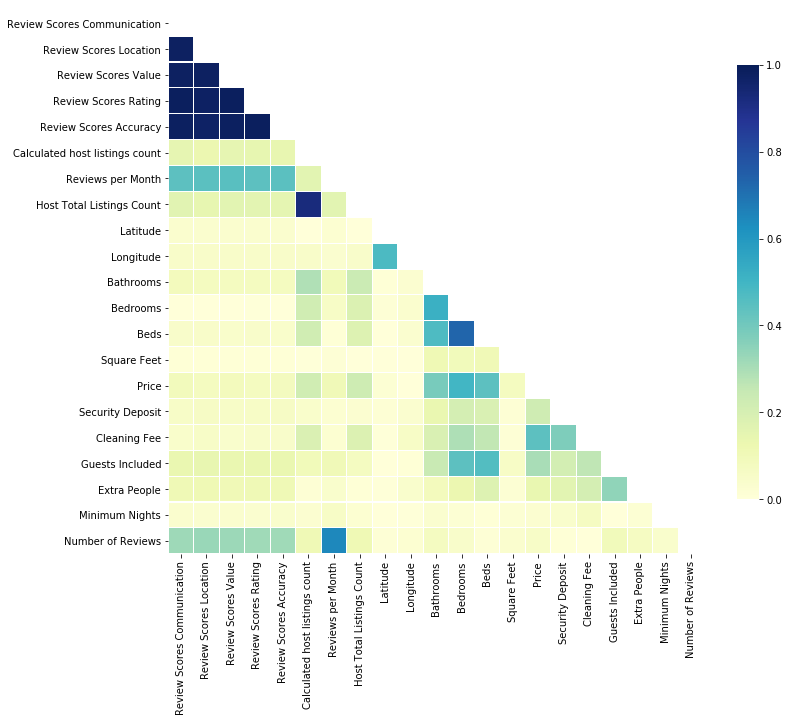

In [75]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numeric_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que con respecto a la variable objetivo, tan solo están altamente correladas las caracteristicas numericas de:

    - Numero de habitaciones
    - Numero de camas
    - Número de baños
    
Ahora, exploraremos las variables nuumericas

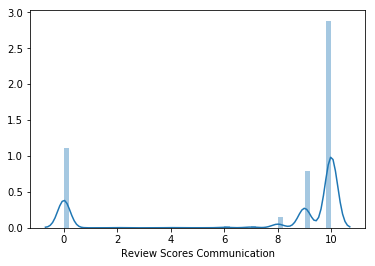

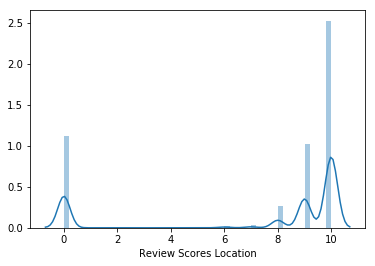

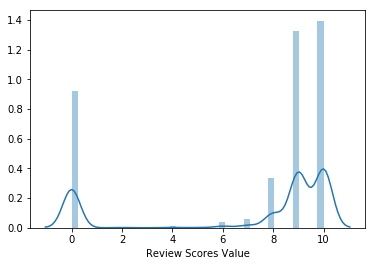

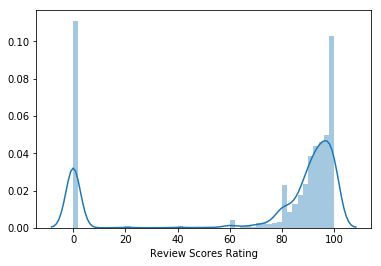

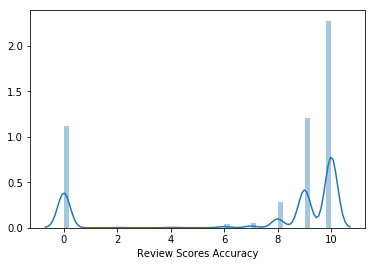

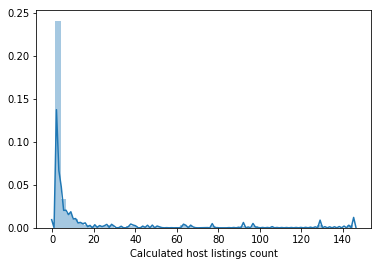

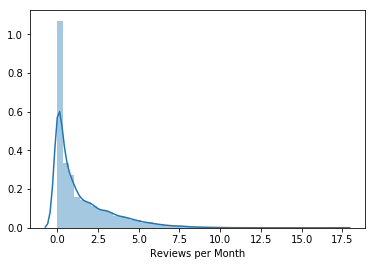

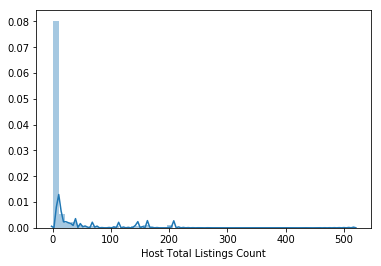

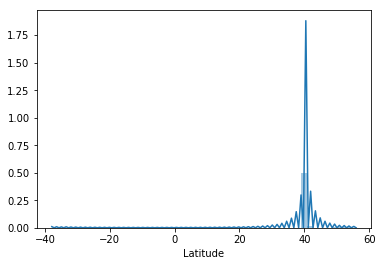

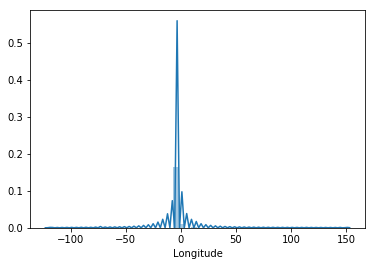

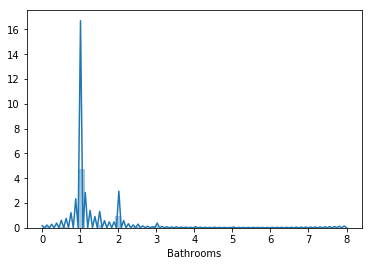

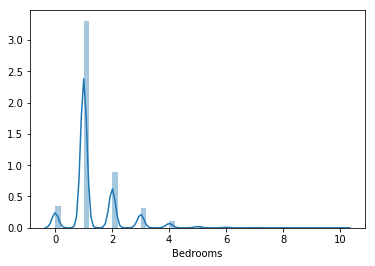

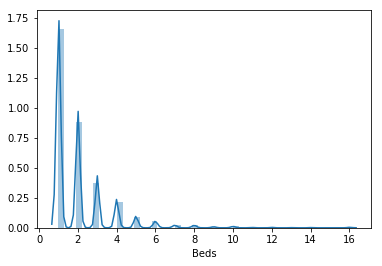

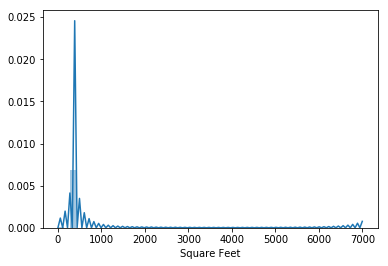

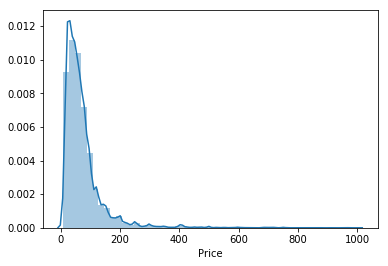

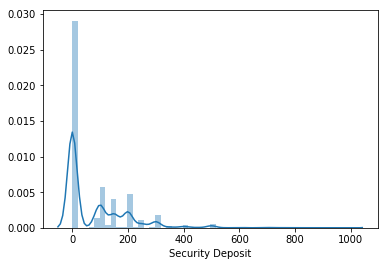

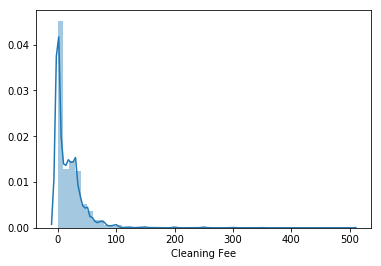

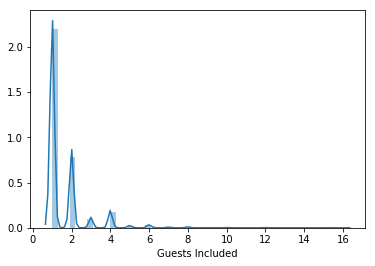

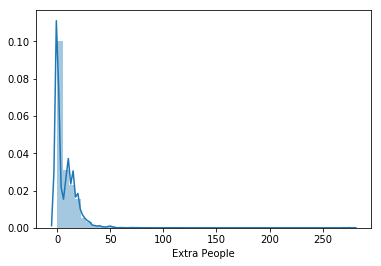

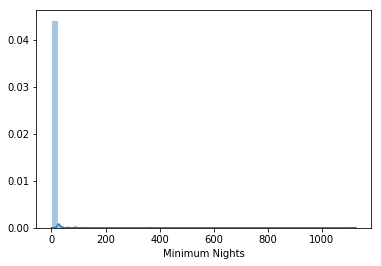

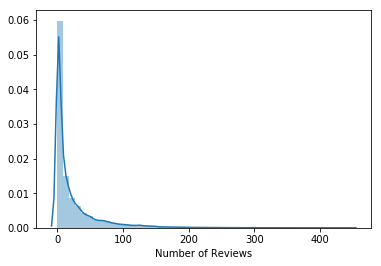

In [95]:
for i, col in enumerate(numeric_data.columns):
    plt.figure(i)
    sns.distplot(numeric_data[col])

## Train Test Split & Feature Engineering

En esta seccion llevaremos a cabo el tratamiento apropiado de las dimensiones. Para las variables categoricas realizaremos la tecnica de One-Hot Encoding (que explicaremos mas adelante) y para las variables numericas realizaremos un escalado.

In [106]:
X = data.drop('Price', axis=1)
y = data.Price

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [108]:
numeric_cols = cols.drop('Price')
cols

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

In [109]:
numerical_data = X[numeric_cols]
X[numeric_cols] = scaler.fit_transform(numerical_data)

In [110]:
X = pd.get_dummies(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training and Testing a Decision Tree Regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

best mean cross-validation score: 0.493
best parameters: {'max_depth': 8}


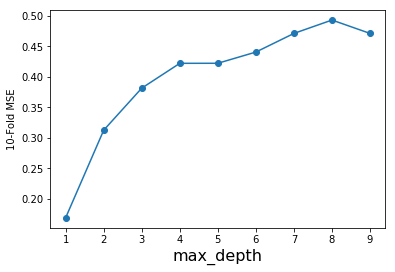

In [113]:
maxDepth = range(1,10)
numLeaves = 3
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [114]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo-2).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))


Score Train:  0.5884381906241253
Score Test:  0.4861207318875397


## Training and Testing a Random Forest

best mean cross-validation score: 0.518
best parameters: {'max_depth': 14}


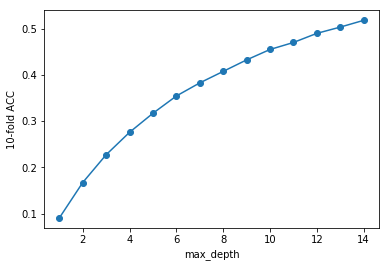

In [115]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [116]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.6814815306307822
Score Test:  0.5585980364675607


## Importancia y Dependencia

In [117]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(bagModel)

In [118]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [119]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [120]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

41

In [121]:
selected_feat

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews', 'Jurisdiction Names_MALIBU',
       'Jurisdiction Names_None', 'Cancellation Policy_flexible',
       'Cancellation Policy_moderate', 'Cancellation Policy_strict',
       'Host Neighbourhood_Cortes',
       'Host Neighbourhood_Invalides - Ecole Militaire',
       'Host Neighbourhood_Justicia', 'Host Neighbourhood_La Latina',
       'Host Neighbourhood_Malibu', 'Host Neighbourhood_No data',
       'Host Neighbourhood_Paddington', 'Host Neighbourhood_Palacio',
       'Host Neighbourhood_Sheung Wan', 'Host Neighbourhood_Tsim Sha Tsui',
       'Host Ne

Ahora que sabemos cuales son las dimensiones mas relevantes, volvemos a entrenar los modelos tan solo con ellas.

In [122]:
X_best_features = X[selected_feat]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.2, random_state=42)

## Decision Tree

best mean cross-validation score: 0.477
best parameters: {'max_depth': 7}


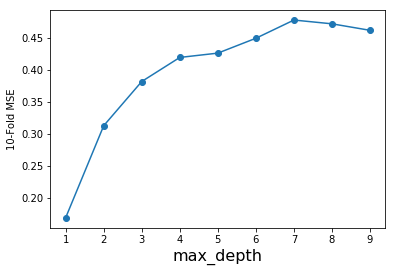

In [124]:
maxDepth = range(1,10)
numLeaves = 3
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [125]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo-2).fit(X_train,y_train)

print("Score Train: ",treeModel.score(X_train,y_train))
print("Score Test: ",treeModel.score(X_test,y_test))


Score Train:  0.531252561888037
Score Test:  0.42506134458209843


## Random Forest

best mean cross-validation score: 0.604
best parameters: {'max_depth': 14}


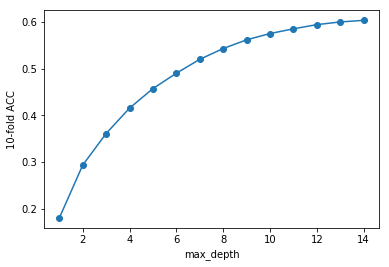

In [126]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [127]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=14,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Score Train: ",bagModel.score(X_train,y_train))
print("Score Test: ",bagModel.score(X_test,y_test))

Score Train:  0.8361188788556019
Score Test:  0.6643781080566719


## Train and Test a Gradiant Boost Regressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000] 
learningRate = [0.1,0.05] 

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.589
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


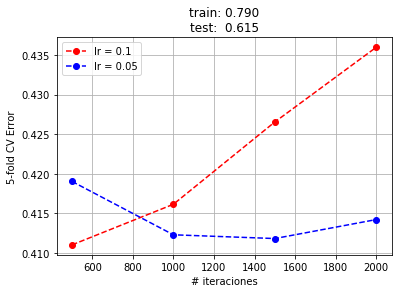

In [129]:
lRateOptimo = grid.best_params_['learning_rate']
nEstimatorsOptimo = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lRateOptimo, n_estimators=nEstimatorsOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()